In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

from tilk_e import Circuit
from Modules.circuit import circuit_chart

In [2]:
np.random.seed(1337)
c = Circuit()
print(c.check_validity_curvature())

({'interior_curve': {'curvature': False}, 'exterior_curve': {'curvature': False}, 'middle_curve': {'curvature': False}, 'distances': {'interior_exterior': True, 'interior_middle': True, 'exterior_middle': True}}, {'middle': array([ 79.04158752,  79.14164016,  79.24169281,  79.34174545,
        79.44179809,  79.54185073,  79.64190338,  79.74195602,
        79.84200866,  79.9420613 ,  80.04211394,  80.14216659,
        80.24221923,  80.34227187,  80.44232451,  80.54237716,
        80.6424298 ,  80.74248244,  80.84253508,  80.94258773,
        81.04264037,  81.14269301,  81.24274565,  81.3427983 ,
        81.44285094,  81.54290358,  81.64295622,  81.74300887,
        81.84306151,  81.94311415,  82.04316679,  82.14321944,
        82.24327208,  82.34332472,  82.44337736,  82.54343001,
        82.64348265,  82.74353529,  82.84358793,  82.94364058,
        83.04369322,  83.14374586,  93.44916803,  93.54922067,
        93.64927332,  93.74932596,  93.8493786 ,  93.94943124,
        94.04948389,

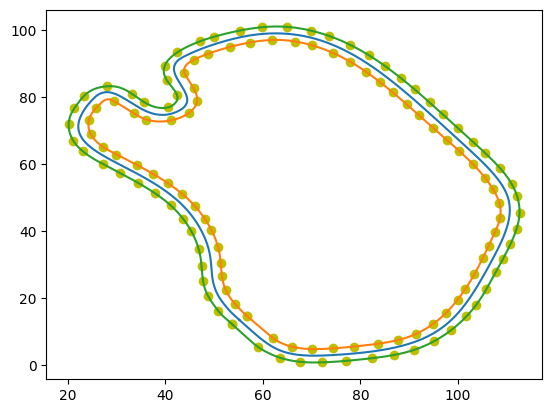

In [3]:
c.populate_circuit()
c.plot()

In [4]:
c.chart().resolve_axis(
    y='shared',
    x='shared'
)

alt.LayerChart(...)

In [ ]:
circuit_chart(c)